In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import os

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.optim import Adam, SGD
from torch.utils.data import Dataset, DataLoader

from sklearn.metrics import *
from sklearn.linear_model import LassoCV
#Transformers
from module import *

In [2]:
# Load training data set (small amount to test if it works first)

xtrain = r"data/training_sample_4s.csv.gz"
ytrain = r"data/training_label_4s.csv.gz"
xtest = r"data/testing_sample2_4s.csv.gz"
ytest = r"data/testing_label_4s.csv.gz"

In [3]:
#check balance

samplesdf = pd.DataFrame()
for df in  pd.read_csv(xtrain,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
x_train = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(ytrain,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
y_train = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(xtest,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
x_test = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(ytest,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
y_test = samplesdf.to_numpy()

num0 = 0
num1 = 0
for x in y_train:
    if x == 0:
        num0 = num0 + 1
    else:
        num1 = num1 + 1
num0,num1 #checking if it is balanced

(3863, 3158)

In [4]:
y_train = y_train.reshape(-1)
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(833, 3271)
(833, 1)
(7021, 3271)
(7021,)


In [5]:
# Hyper Parameters
EPOCH = 20             # train the training data n times, to save time, we just train 1 epoch
LR = 0.0001              # learning rate
batch_size = 32
wd = LR / EPOCH

In [6]:
reg = LassoCV(cv=5, random_state = 0).fit(x_train,y_train)
print("done")


C:\Users\good6\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1806723044198293, tolerance: 0.13891280270655273
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\good6\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.40990072092563423, tolerance: 0.13891280270655273
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\good6\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4060594152996657, tolerance: 0.13891280270655273
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\good6\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.

C:\Users\good6\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17766239209632317, tolerance: 0.13919825529642163
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\good6\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.26914384009768355, tolerance: 0.13885988962079415
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\good6\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3460655027897701, tolerance: 0.13885988962079415
  model = cd_fast.enet_coordinate_descent_gram(


done


In [7]:
testresult = reg.predict(x_test)
trainresult = reg.predict(x_train)
for x in testresult:
    print(x)

-0.0026611780071282565
0.5382274093750871
0.17656159969112023
0.38819156306185604
0.8985701865831398
-0.10260951959753459
0.5305717232780752
0.30889040810066004
0.2744072606559992
0.8196156602019811
0.01274195275934975
-0.05140241593555653
0.8449912286654847
0.6644387792874952
-0.03910152411553243
1.074521595329791
0.9015750875257528
0.5303651280059275
0.8603865915744745
0.7036027190761648
0.0023539272513137532
-0.2725210180924862
-0.07861950833676554
0.610092648234948
0.38217184690868705
0.7350913101165939
0.5039082121784355
0.9129347862818845
0.13259713026402145
0.7116770827042078
-0.0006287854990176533
0.9719543919819257
0.1034916671012448
0.2651684001242971
0.2571242955146221
0.686806621652525
0.9927500829119954
0.8540503573939177
0.6525946467702822
0.29480494907977517
0.17136679255458986
0.09720869992704445
0.7395666793323621
0.7699057052046752
0.6608488445213319
0.5431929660286157
1.129014319514836
0.943910785976113
0.7710961683841986
0.8235712802651663
1.3473949513988392
0.93814

In [8]:
i = 0
correct = 0
for x in trainresult:
    if x >=0.5 and y_train[i] == 1:
        correct = correct + 1
    elif x < 0.5 and y_train[i] == 0:
        correct = correct + 1
    i = i + 1
trainacc = correct/i
i = 0
correct = 0
for x in testresult:
    if x >=0.5 and y_test[i] == 1:
        correct = correct + 1
    elif x < 0.5 and y_test[i] == 0:
        correct = correct + 1
    i = i + 1
testacc = correct/i
trainacc,testacc

(0.9371884346959123, 0.8967587034813925)

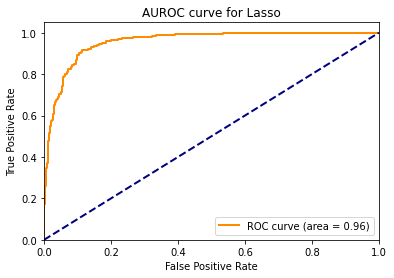

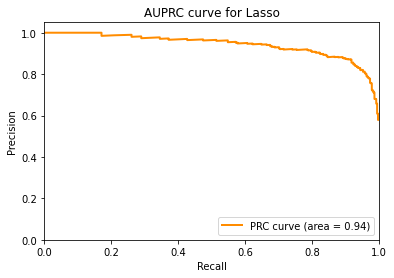

AUPRC = 0.94
f1_score = 0.89


In [9]:
fpr, tpr, _ = roc_curve(y_test,testresult)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr,tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC curve for Lasso')
plt.legend(loc="lower right")
plt.show()
precision, recall, _ = precision_recall_curve(y_test,testresult)
prc_auc = auc(recall,precision)
plt.plot(recall,precision, color='darkorange',
         lw=lw, label='PRC curve (area = %0.2f)' % prc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('AUPRC curve for Lasso')
plt.legend(loc="lower right")
plt.show()
print("AUPRC = %.02f"% prc_auc)
ss = np.zeros((len(testresult)))
i = 0
for x in testresult:
    if x >= 0.5:
        ss[i] = 1
    else:
        ss[i] = 0
    i = i + 1
f1s = f1_score(y_test,ss)
print("f1_score = %.02f"% f1s)
df = pd.DataFrame(y_test)
df.to_csv(r"data/lassolb.csv.gz",index=False,sep=",",compression="gzip")
df = pd.DataFrame(testresult)
df.to_csv(r"data/lassopredict.csv.gz",index=False,sep=",",compression="gzip")
